In [27]:
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt
import utils.data_utils as du
%matplotlib inline

In [25]:
def show_slice(data):
  plt.figure(figsize=(8,8))
  ax = plt.imshow(data, cmap='gray')
  plt.axis('off')
  ax.axes.get_xaxis().set_visible(False)
  ax.axes.get_yaxis().set_visible(False)

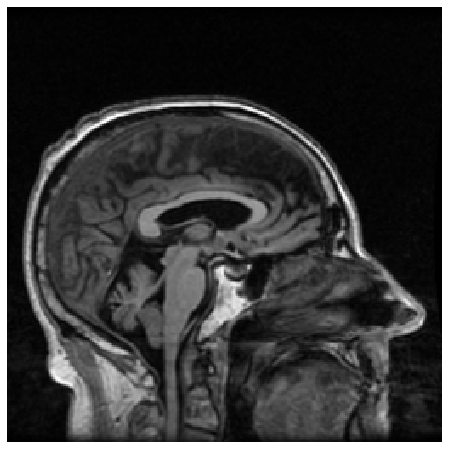

In [26]:
data_file_path = 'datasets/ADNI/MRI_S22389_SCAN0_T1.nii.gz'
data = nib.load(data_file_path).get_fdata()/255
show_slice(data[125, :, :])

In [31]:
from run import evaluate_bulk
from settings import Settings

In [34]:
settings_eval = Settings('settings_eval.ini')
evaluate_bulk(settings_eval['EVAL_BULK'])

/Users/srinivas/Virtual_ENVs/jlab/lib/python3.7/site-packages/torch/serialization.py:453: SourceChangeWarning: source code of class 'torch.nn.modules.batchnorm.BatchNorm2d' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/Users/srinivas/Virtual_ENVs/jlab/lib/python3.7/site-packages/torch/serialization.py:453: SourceChangeWarning: source code of class 'torch.nn.modules.activation.PReLU' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/Users/srinivas/Virtual_ENVs/jlab/lib/python3.7/site-packages/torch/serialization.py:453: SourceChangeWarning: source code of class 'torch.nn.modules.dropout.Dropout2d' has changed. you can retriev

KeyboardInterrupt: 